<a href="https://colab.research.google.com/github/dharahadi/trabalho-imagem/blob/main/EDA_wien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MentalHealth

In [1]:
import pandas as pd

In [ ]:
df_MH = pd.read_csv('mentalHealth.csv')

In [3]:
# df_MH = df_MH.drop('Code', axis=1)
df_MH = df_MH.iloc[:6470]

In [4]:
df_MH_2011 = df_MH[df_MH['Year'] == '2011']

In [ ]:
df_MH_2011.isnull().sum()

In [6]:
df_MH_2011 = df_MH_2011.rename(columns={'Entity': 'Country'})

In [ ]:
df_MH_2011.columns

In [32]:
cols_to_float = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
for col in cols_to_float:
    df_MH_2011[col] = pd.to_numeric(df_MH_2011[col], errors='coerce')

df_MH_2011['Year'] = pd.to_numeric(df_MH_2011['Year'], errors='coerce').astype('Int64')

### WorldDevelopment

In [9]:
df_WD = pd.read_csv('worldDevelopment.csv')

In [10]:
df_WD = df_WD.rename(columns={'LongName': 'Country', 'PppSurveyYear': 'Year'})

In [11]:
df_WD_2011 = df_WD[df_WD['Year'] == '2011']

In [12]:
df_WD_2011 = df_WD_2011[['Country', 'Year', 'IncomeGroup', 'Region']]

In [ ]:
df_WD_2011.isnull().sum()

In [22]:
# df_DW_2011.dtypes

In [14]:
df_WD_2011['Year'] = pd.to_numeric(df_WD_2011['Year'], errors='coerce').astype('Int64')

In [ ]:
df_WD_2011.columns

### Analysis





#### Analysis 1

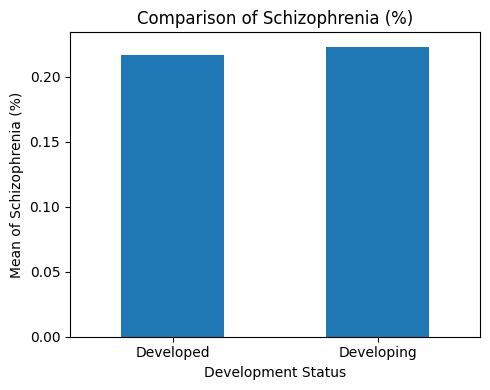

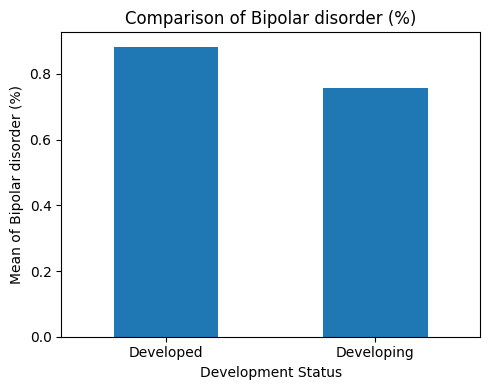

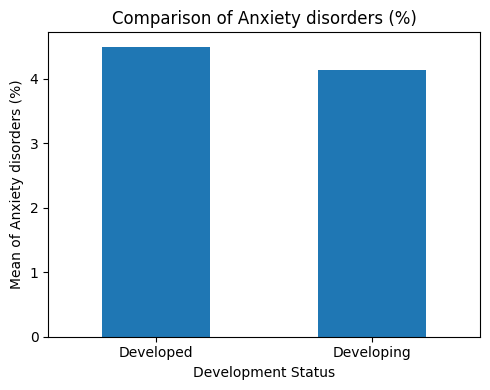

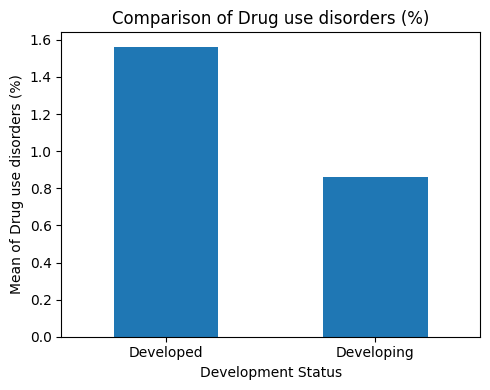

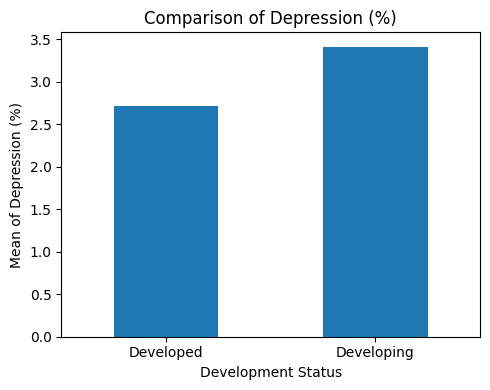

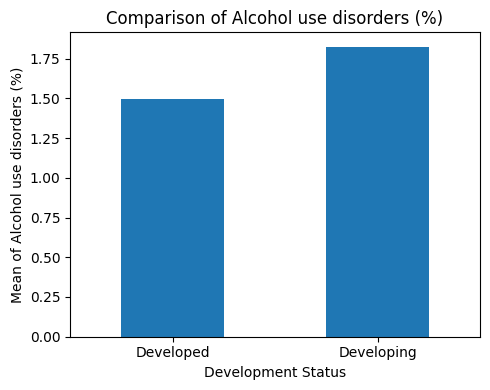

In [68]:
#Comparison of Mental Disorders Between Developed and Developing Countries
import matplotlib.pyplot as plt

#merging df
df_combined = pd.merge(df_MH_2011, df_WD_2011, on='Country', how='inner')

developed_countries = ['High income', 'High income: nonOECD']
df_combined['Development Status'] = df_combined['IncomeGroup'].apply(
    lambda x: 'Developed' if x in developed_countries else 'Developing'
)

disorders = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Anxiety disorders (%)',
             'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

mean_disorders = df_combined.groupby('Development Status')[disorders].mean()

mean_disorders = mean_disorders.reindex(['Developed', 'Developing'], fill_value=0)

for disorder in disorders:
    plt.figure(figsize=(5, 4))
    mean_disorders[disorder].plot(kind='bar')
    plt.title(f'Comparison of {disorder}', fontsize=12)
    plt.xlabel('Development Status')
    plt.ylabel(f'Mean of {disorder}')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [66]:
print(df_combined['Development Status'].value_counts())


Development Status
Developing    14
Developed      3
Name: count, dtype: int64


In [67]:
grouped_data = df_combined.groupby('Development Status')[disorders].mean()
display(grouped_data)


,Schizophrenia (%),Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Development Status,,,,,,
Developed,0.216571,0.882395,4.497725,1.562579,2.712735,1.493236
Developing,0.223132,0.757909,4.139225,0.860071,3.408629,1.824367


#### Analysis 2

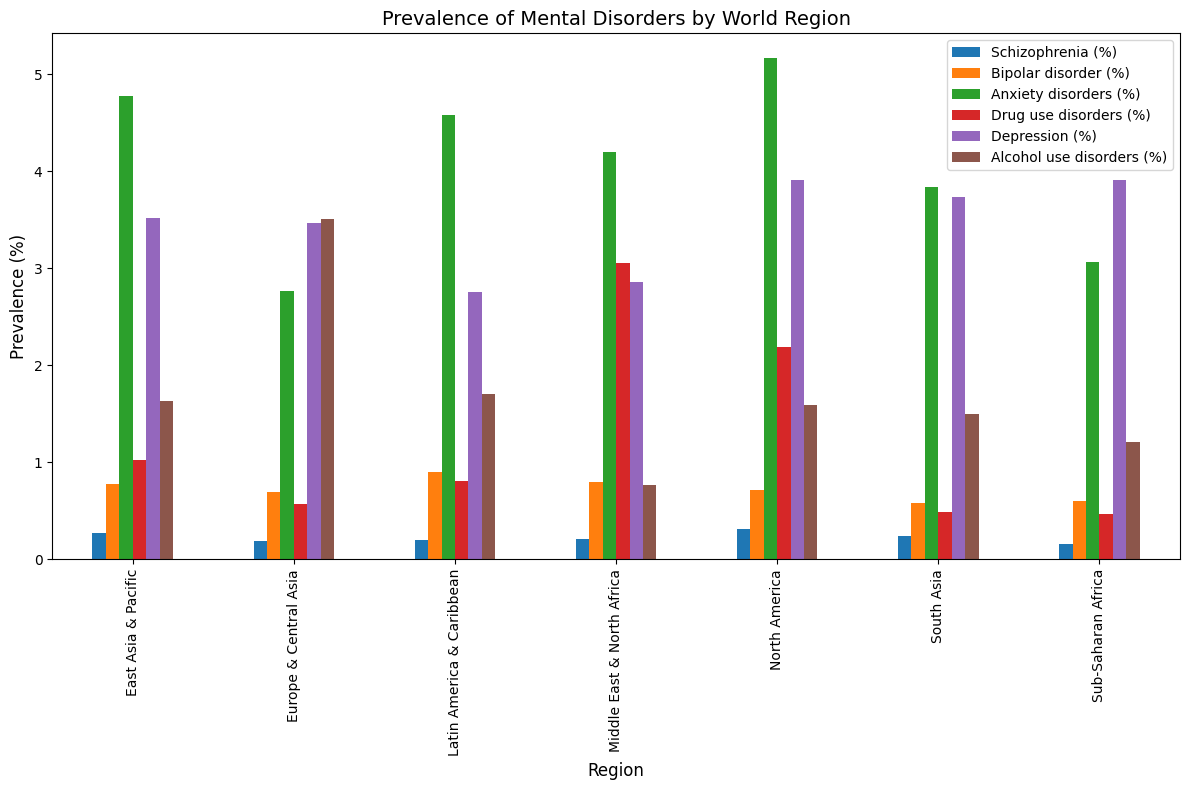

In [52]:
#Analyze how the prevalence of anxiety and depression differs across world regions

region_stats = df_combined.groupby('Region')[disorders].mean()

region_stats.plot(kind='bar', figsize=(12, 8))

plt.title('Prevalence of Mental Disorders by World Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Prevalence (%)', fontsize=12)
plt.tight_layout()

plt.show()


,Schizophrenia (%),Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Region,,,,,,
East Asia & Pacific,0.270031,0.781056,4.771412,1.023655,3.522952,1.628134
Europe & Central Asia,0.192009,0.696964,2.768651,0.568752,3.467555,3.508739
Latin America & Caribbean,0.204379,0.905209,4.581812,0.804502,2.750545,1.702401
Middle East & North Africa,0.213037,0.801993,4.202652,3.055161,2.857147,0.767950
North America,0.314082,0.713801,5.163595,2.188105,3.913974,1.592540
South Asia,0.244832,0.580965,3.835695,0.492166,3.739861,1.500172
Sub-Saharan Africa,0.155599,0.605876,3.063279,0.467085,3.908923,1.207879


### Teste


In [64]:
# Lista de países desenvolvidos
developed_countries = ['High income', 'High income: nonOECD']

# Função para verificar se um país é desenvolvido
def is_developed(country):
    # Verifica se o país existe no DataFrame
    if country in df_combined['Country'].values:
        income_group = df_combined.loc[df_combined['Country'] == country, 'IncomeGroup'].values[0]
        return income_group in developed_countries
    else:
        print(f'{country} not found in the dataset.')
        return False

# Exemplo de uso
country = 'Principality of Andorra'  # Substitua pelo nome do país que deseja verificar
if is_developed(country):
    print(f'{country} is a developed country.')
else:
    print(f'{country} is a developing country or not found.')


Principality of Andorra not found in the dataset.
Principality of Andorra is a developing country or not found.


In [65]:
# prompt: Para determinar se um país é desenvolvido com base na sua classificação de renda

import pandas as pd

# ... (your existing code) ...

# Lista de países desenvolvidos
developed_countries = ['High income', 'High income: nonOECD']

# Função para verificar se um país é desenvolvido
def is_developed(country):
    # Verifica se o país existe no DataFrame
    if country in df_combined['Country'].values:
        income_group = df_combined.loc[df_combined['Country'] == country, 'IncomeGroup'].values[0]
        return income_group in developed_countries
    else:
        return False # Return False if country not found, avoids error

# Exemplo de uso (com tratamento para países não encontrados)
country_name = input("Enter the country name: ")
if is_developed(country_name):
    print(f'{country_name} is classified as a developed country.')
else:
    print(f'{country_name} is classified as a developing country or not found in the dataset.')

Enter the country name: Principality of Andorra
Principality of Andorra is classified as a developing country or not found in the dataset.
